Импорь библиотек для EDA

In [224]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import skew, norm
import scipy.stats as stats
from scipy.stats import norm

import warnings

warnings.filterwarnings(action="ignore")

In [225]:
data = pd.read_csv('data_3.csv')
data_w = data.copy()
data_w.columns = data_w.columns.str.replace(' ', '')
data_w.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed:0.1              120 non-null    int64  
 1   Unnamed:0                120 non-null    int64  
 2   price                    120 non-null    int64  
 3   rooms                    101 non-null    float64
 4   area                     107 non-null    float64
 5   kitchen_area             89 non-null     float64
 6   floor                    107 non-null    float64
 7   renovation               120 non-null    int64  
 8   deal_type                120 non-null    int64  
 9   balcony                  120 non-null    int64  
 10  trash_chute              83 non-null     float64
 11  Годпостройки             107 non-null    float64
 12  Материалстен             117 non-null    object 
 13  Сериядома                43 non-null     object 
 14  Количествоэтажей         1

In [226]:
data_w.head()

,Unnamed:0.1,Unnamed:0,price,rooms,area,kitchen_area,floor,renovation,deal_type,balcony,...,years_in_ownership,number_of_owners,energy_efficiency_class,power_supply,number_of_elevators,ventilation,freight_elevator,gas_supply,latitude,longitude
0,0,0,4500000,1.0,22.6,3.0,3.0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.122565,131.907848
1,1,1,10000000,3.0,75.4,5.0,6.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.118957,131.968481
2,2,2,6650000,1.0,31.6,5.0,2.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.183735,131.925201
3,3,3,11000000,2.0,47.0,3.1,6.0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.086209,131.854930
4,4,4,4900000,1.0,24.1,3.0,16.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.118827,131.970732


Проведенный анализ распределения целевой переменной 'price' показывает, что данные распределены не нормально с сильным смещением

<Axes: xlabel='price', ylabel='Density'>

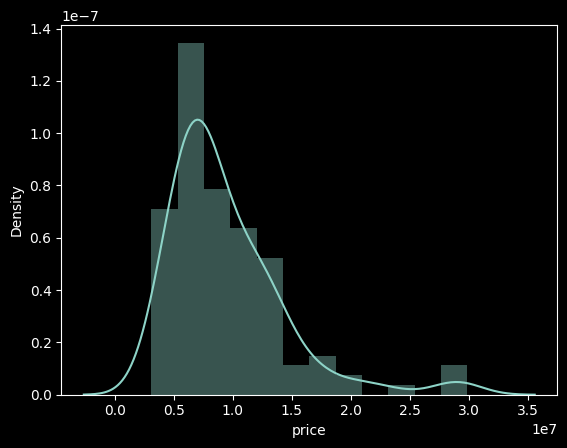

In [227]:

sns.distplot(data_w['price'])


Проведенный тест Шапиро-Уилка подтверждает гипотезу не гауссовского распределения, следовательно необходимо использовать средства нормализации. В данном примере будет использоваться логарифмизация

In [228]:
from scipy import stats

shap_t,shap_p = stats.shapiro(data_w['price'])

print("Skewness: %f" % abs(data_w['price']).skew())
print("Kurtosis: %f" % abs(data_w['price']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.919558
Kurtosis: 4.771441
Shapiro_Test: 0.829326
Shapiro_Test: 0.000000


In [229]:
data_w['price'].describe()

count    1.200000e+02
mean     9.454758e+06
std      4.963650e+06
min      3.100000e+06
25%      6.175000e+06
50%      7.900000e+06
75%      1.168750e+07
max      2.985000e+07
Name: price, dtype: float64

In [230]:
data_w['Жилая'] = data_w['Жилая'].str.replace('м2', '').str.replace(',', '.').astype(float)


Построение корреляционной матрицы

In [231]:
correlation_matrix = data_w.corr(numeric_only=True)
correlation_matrix

,Unnamed:0.1,Unnamed:0,price,rooms,area,kitchen_area,floor,renovation,deal_type,balcony,...,Количествоэтажей,Лифт,Количествобалконов,Количествоквартир,Количествоподъездов,Жилая,number_of_owners,number_of_elevators,latitude,longitude
Unnamed:0.1,1.000000,1.000000,-0.005592,-0.039623,0.076052,0.223160,-0.061105,-0.045782,0.097348,-0.060624,...,0.131805,NaN,NaN,0.083758,NaN,-0.262652,NaN,NaN,0.077248,-0.079997
Unnamed:0,1.000000,1.000000,-0.005592,-0.039623,0.076052,0.223160,-0.061105,-0.045782,0.097348,-0.060624,...,0.131805,NaN,NaN,0.083758,NaN,-0.262652,NaN,NaN,0.077248,-0.079997
price,-0.005592,-0.005592,1.000000,0.542750,0.797276,0.557584,0.144042,0.163671,-0.150963,-0.024127,...,0.151448,NaN,NaN,-0.096010,NaN,0.988700,NaN,NaN,0.058286,-0.063173
rooms,-0.039623,-0.039623,0.542750,1.000000,0.734159,0.300069,0.014339,0.216464,-0.012910,0.029882,...,-0.168703,NaN,NaN,-0.002799,NaN,0.583396,NaN,NaN,-0.120428,0.118261
area,0.076052,0.076052,0.797276,0.734159,1.000000,0.553952,-0.011374,0.210457,-0.063965,0.125824,...,-0.057357,NaN,NaN,-0.027143,NaN,0.995342,NaN,NaN,-0.046764,0.046656
kitchen_area,0.223160,0.223160,0.557584,0.300069,0.553952,1.000000,-0.037544,0.117352,-0.108713,-0.069396,...,0.135452,NaN,NaN,-0.212051,NaN,0.994711,NaN,NaN,-0.075843,0.079657
floor,-0.061105,-0.061105,0.144042,0.014339,-0.011374,-0.037544,1.000000,-0.165150,-0.107218,0.103182,...,0.501469,NaN,NaN,0.150871,NaN,0.431976,NaN,NaN,-0.035700,0.025328
renovation,-0.045782,-0.045782,0.163671,0.216464,0.210457,0.117352,-0.165150,1.000000,0.082432,-0.018334,...,-0.365842,NaN,NaN,-0.094465,NaN,0.162398,NaN,NaN,0.057681,-0.061687
deal_type,0.097348,0.097348,-0.150963,-0.012910,-0.063965,-0.108713,-0.107218,0.082432,1.000000,0.034586,...,-0.064217,NaN,NaN,0.051226,NaN,NaN,NaN,NaN,0.075500,-0.073683
balcony,-0.060624,-0.060624,-0.024127,0.029882,0.125824,-0.069396,0.103182,-0.018334,0.034586,1.000000,...,0.019660,NaN,NaN,0.047651,NaN,-0.690420,NaN,NaN,0.094805,-0.098463


Согласно корреляционному анализу можно сделать вывод о характеристиках, которые плохо коррелируют с прогнозируемой величиной. Также был выведен определенный набор признаков, у которых слишком большое количество пустых значений. Также несколько фичей логическим образом не влияют на цену недвижимости. Следовательно эти данные требуется удалить из выборки.

In [232]:
# cat_over_columns = ['Сериядома' , 'Типперекрытий' ,'Типфундамента', 'Горячееводоснабжение', 'Холодноеводоснабжение', 'Теплоснабжение', 'Водоотведение', 'years_in_ownership', 'energy_efficiency_class', 'power_supply' , 'ventilation', 'freight_elevator', 'gas_supply']
# data_w.drop(columns=cat_over_columns, inplace=True)

In [233]:
too_much_columns = ['Жилая', 'number_of_owners', 'Теплоснабжение','number_of_elevators', 'energy_efficiency_class','gas_supply', 'freight_elevator', 'ventilation', 'number_of_owners', 'power_supply', 'Количествоподъездов', 'years_in_ownership', 'Водоотведение', 'Водоотведение', 'gas_supply']
data_w.drop(columns=too_much_columns, inplace=True)

In [234]:
columns_to_remove = ['Unnamed:0', 'Unnamed:0.1', 'longitude', 'latitude', 'Сериядома']
data_w.drop(columns=[col for col in columns_to_remove if col in data_w.columns], inplace=True)

In [235]:
data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  120 non-null    int64  
 1   rooms                  101 non-null    float64
 2   area                   107 non-null    float64
 3   kitchen_area           89 non-null     float64
 4   floor                  107 non-null    float64
 5   renovation             120 non-null    int64  
 6   deal_type              120 non-null    int64  
 7   balcony                120 non-null    int64  
 8   trash_chute            83 non-null     float64
 9   Годпостройки           107 non-null    float64
 10  Материалстен           117 non-null    object 
 11  Количествоэтажей       116 non-null    float64
 12  Лифт                   48 non-null     float64
 13  Типперекрытий          102 non-null    object 
 14  Типфундамента          57 non-null     object 
 15  Горяче

У оставшихся признаках требуется удалить пустые значения. Для числовых значений будет использоваться медианное по всему столбцу, а для категориальных соответственно модальное значение

In [236]:
medians = data_w.select_dtypes(include='number').median()
data_w.fillna(value=medians, inplace=True)

modes = data_w.select_dtypes(include='object').mode().iloc[0]
data_w.fillna(value=modes, inplace=True)

data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  120 non-null    int64  
 1   rooms                  120 non-null    float64
 2   area                   120 non-null    float64
 3   kitchen_area           120 non-null    float64
 4   floor                  120 non-null    float64
 5   renovation             120 non-null    int64  
 6   deal_type              120 non-null    int64  
 7   balcony                120 non-null    int64  
 8   trash_chute            120 non-null    float64
 9   Годпостройки           120 non-null    float64
 10  Материалстен           120 non-null    object 
 11  Количествоэтажей       120 non-null    float64
 12  Лифт                   120 non-null    float64
 13  Типперекрытий          120 non-null    object 
 14  Типфундамента          120 non-null    object 
 15  Горяче

In [237]:
columns_to_remove = ['Unnamed:0', 'Unnamed:0.1']
data_w.drop(columns=[col for col in columns_to_remove if col in data_w.columns], inplace=True)

Проверка всех столбцов на количество NaN значений

In [238]:
data_w.isnull().sum()

price                    0
rooms                    0
area                     0
kitchen_area             0
floor                    0
renovation               0
deal_type                0
balcony                  0
trash_chute              0
Годпостройки             0
Материалстен             0
Количествоэтажей         0
Лифт                     0
Типперекрытий            0
Типфундамента            0
Горячееводоснабжение     0
Количествобалконов       0
Количествоквартир        0
Холодноеводоснабжение    0
dtype: int64

In [239]:
correlation_matrix = data_w.corr(numeric_only=True)
correlation_matrix

,price,rooms,area,kitchen_area,floor,renovation,deal_type,balcony,trash_chute,Годпостройки,Количествоэтажей,Лифт,Количествобалконов,Количествоквартир
price,1.000000,0.481614,0.722532,0.451951,0.131638,0.163671,-0.150963,-0.024127,-0.076938,0.215919,0.147507,NaN,NaN,-0.033796
rooms,0.481614,1.000000,0.713953,0.241589,0.014877,0.195145,-0.008821,0.029430,0.057445,-0.091112,-0.157924,NaN,NaN,0.000552
area,0.722532,0.713953,1.000000,0.488314,-0.006381,0.202755,-0.055174,0.120357,-0.026454,0.064275,-0.062793,NaN,NaN,-0.007239
kitchen_area,0.451951,0.241589,0.488314,1.000000,-0.030105,0.101587,-0.096663,-0.057183,-0.012660,0.229236,0.124082,NaN,NaN,-0.090746
floor,0.131638,0.014877,-0.006381,-0.030105,1.000000,-0.142651,-0.095299,0.099117,-0.156296,0.372193,0.359982,NaN,NaN,0.060090
renovation,0.163671,0.195145,0.202755,0.101587,-0.142651,1.000000,0.082432,-0.018334,0.090471,-0.353010,-0.371237,NaN,NaN,-0.038983
deal_type,-0.150963,-0.008821,-0.055174,-0.096663,-0.095299,0.082432,1.000000,0.034586,-0.031858,-0.003640,-0.066513,NaN,NaN,0.031043
balcony,-0.024127,0.029430,0.120357,-0.057183,0.099117,-0.018334,0.034586,1.000000,-0.065795,0.023347,0.019274,NaN,NaN,0.029442
trash_chute,-0.076938,0.057445,-0.026454,-0.012660,-0.156296,0.090471,-0.031858,-0.065795,1.000000,-0.015293,-0.211780,NaN,NaN,-0.082794
Годпостройки,0.215919,-0.091112,0.064275,0.229236,0.372193,-0.353010,-0.003640,0.023347,-0.015293,1.000000,0.662033,NaN,NaN,0.088361


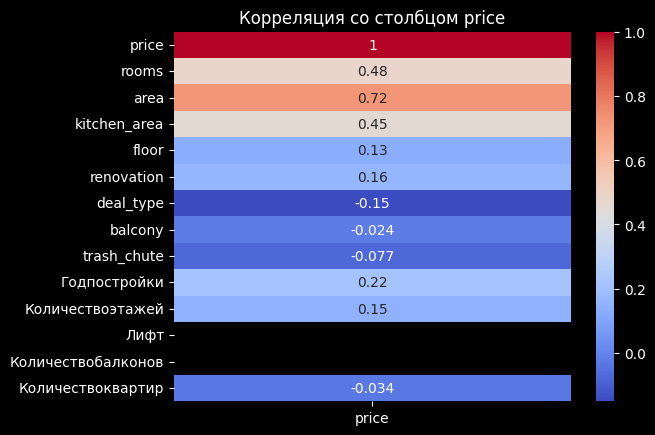

In [240]:
sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm')
plt.title('Корреляция со столбцом price')
plt.show()

Просмотр графика корреляции цены и топ 5 коррелируемых с ней параметров

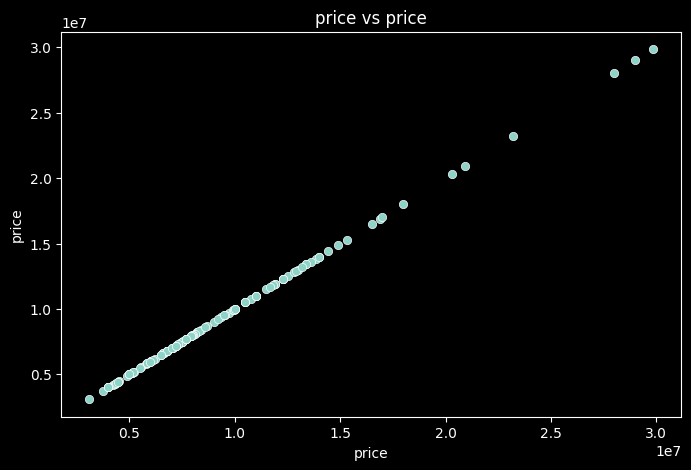

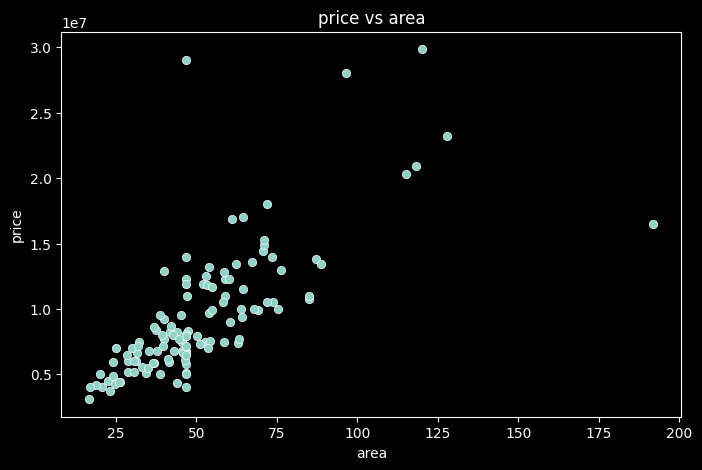

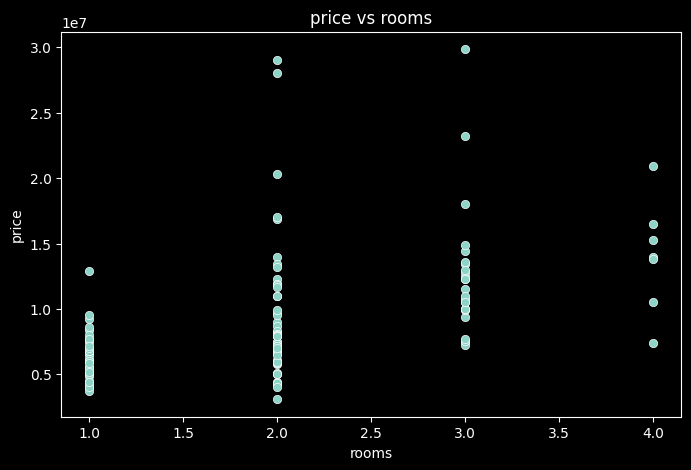

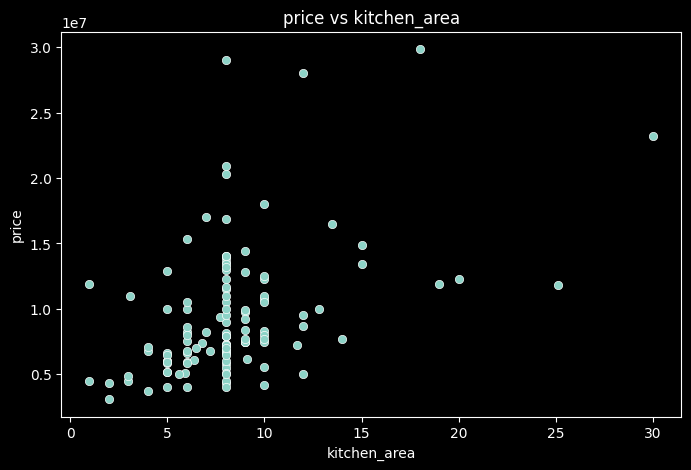

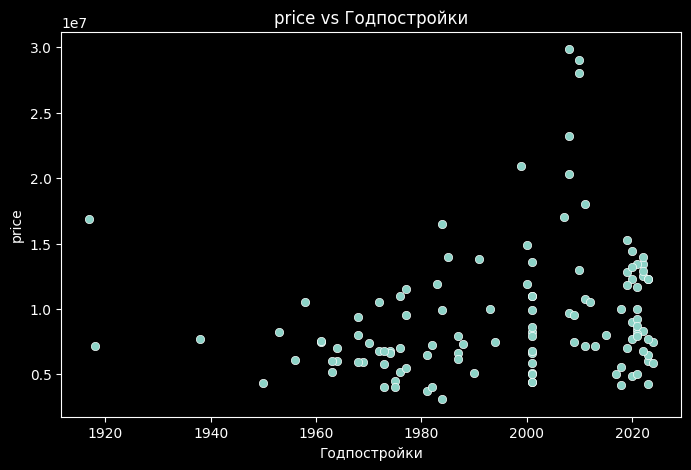

In [241]:
top_features = correlation_matrix['price'].abs().nlargest(5).index
for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data_w, x=feature, y='price')
    plt.title(f'price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()

Логарифмирование цены

In [242]:
data_w['price'] = np.log1p(data_w['price'])

Инициализация библиотек для моделирования

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.utils import resample

results = []

Разбиение выборки на целевую переменную и набор признаков к ней

In [244]:
X = data_w.drop('price', axis=1)
y = data_w['price']

Разбиение выборки на тренировочную и тестовую. Из-за малого объема выборки было решено её расширить в 3 раза, используя метод бутстрапа 

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = resample(X_train, y_train, n_samples=len(X_train) * 5, random_state=42)

print(X_train.shape)

(480, 18)


Создание препроцессора для стандартизации и энекодирования данных для численных и категориальных данных

In [246]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_features = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
numerical_features = [feat for feat in numerical_features if feat not in categorical_features]

In [247]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

Создание модели линейной регрессии с препроцессором

In [248]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [249]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rooms', 'area',
                                                   'kitchen_area', 'floor',
                                                   'renovation', 'deal_type',
                                                   'balcony', 'trash_chute',
                                                   'Годпостройки',
                                                   'Количествоэтажей', 'Лифт',
                                                   'Количествобалконов',
                                                   'Количествоквартир']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Материалстен',
                                                   'Типперекрытий',
                                                   'Типфундамента',
                                                   'Горячееводоснабжение',
                                                   'Холодноеводоснабжение'])])),
                ('model', LinearRegression())])

In [250]:
y_pred = pipeline.predict(X_test)

Данная модель получила 0.058 по шкале значимости, что меньше 10%, следовательно можем признать на 10% значимости релевантность модели, хотя она сама описывает только 53% диспрерсии всей выборки

In [251]:
mse = mean_squared_error(y_test, y_pred)

print(f'Linear Regression Validation MSE: {mse}')
print(f'Linear Regression Validation R2: {r2_score(y_test, y_pred)}')

Linear Regression Validation MSE: 0.07519436976759203
Linear Regression Validation R2: 0.3994059124558931


Далее была предположена эффективность моделирования случайным лесом из-за преобладающего количества категориальных переменных и малого объема выборки

In [252]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [253]:
rf_model = RandomForestRegressor()

In [254]:
rf_param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [255]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

С помощью RandomizedSearchCV мы сможем понять, какие наиболее эффективные параметры модели. Для проверки метод использует кросс-валидацию

In [256]:
rf_search = RandomizedSearchCV(rf_pipeline, rf_param_grid, n_iter=10, cv=3, verbose=1, random_state=42)
rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['rooms',
                                                                                'area',
                                                                                'kitchen_area',
                                                                                'floor',
                                                                                'renovation',
                                                                                'deal_type',
                                                                                'balcony',
                                                                                'trash_chute',
                                                                                'Годпостройки',
                                                                                'Количествоэтажей',
                                                                                'Лифт',
                                                                                'Количествобалконов',
                                                                                'Количествоквартир']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Материал...
                                                                                'Типперекрытий',
                                                                                'Типфундамента',
                                                                                'Горячееводоснабжение',
                                                                                'Холодноеводоснабжение'])])),
                                             ('model',
                                              RandomForestRegressor())]),
                   param_distributions={'model__max_depth': [None, 10, 20, 30],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [50, 100, 200,
                                                                300]},
                   random_state=42, verbose=1)

Получение лучших параметров модели

In [257]:
print(f'Best parameters for Random Forest: {rf_search.best_params_}')


Best parameters for Random Forest: {'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': None}


Модель не показала значительных отличий от линейной регрессии

In [258]:
y_pred_rf = rf_search.predict(X_test)

print(f'Random Forest Validation MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'Random Forest Validation R2: {r2_score(y_test, y_pred_rf)}')

Random Forest Validation MSE: 0.05949034623935723
Random Forest Validation R2: 0.5248374269544207
